# Project 5 - Value Investor

**Introduction:**

A portfolio investment company, which makes investments in the emerging markets around the world,profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles. Their goal is to establish a robust intelligent system to aid their value investing efforts using stock market data. They make investment decisions based on intrinsic value of companies and do not trade on the basis of daily market volatility. Their profit realization strategy typically involves weekly, monthly and quarterly performance of stocks they buy or hold.


**Data Description:**

You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.


**Goal(s):**

- Predict stock price valuations on a daily, weekly and monthly basis. 
- Recommend BUY, HOLD, SELL decisions. 
- Maximize capital returns and minimize losses. Ideally a loss should never happen.
- Minimize HOLD period.


**Success Metrics:**

- Evaluate on the basis of capital returns. 
- Use Bollinger Bands to measure your systems effectiveness.

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

%load_ext autoreload
%autoreload 2

import analysis
import model_training as mt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
stocks = sorted(os.listdir("data"))
[stock for stock in stocks]

['2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Colombia - Cementos Argos SA (CCB).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv',
 '2020Q1Q2Q3Q4-2021Q1 - South Africa - Impala Platinum Holdings Ltd (IMPJ).csv',
 '2020Q1Q2Q3Q4-2021Q1 - South Korea - Dongkuk Steel Mill Co Ltd (001230).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv']

Chosen stock: PAMP - Argentina

Data with initial processing:


,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.250000,49.349998,50.200001,47.549999,878500.0,-2.92
1,2020-01-03,48.799999,48.250000,49.450001,46.500000,595360.0,1.14
2,2020-01-06,48.500000,48.400002,48.700001,47.000000,719240.0,-0.61
3,2020-01-07,47.599998,48.349998,49.000000,46.900002,901950.0,-1.86
4,2020-01-08,46.500000,47.500000,47.500000,46.000000,1180000.0,-2.31


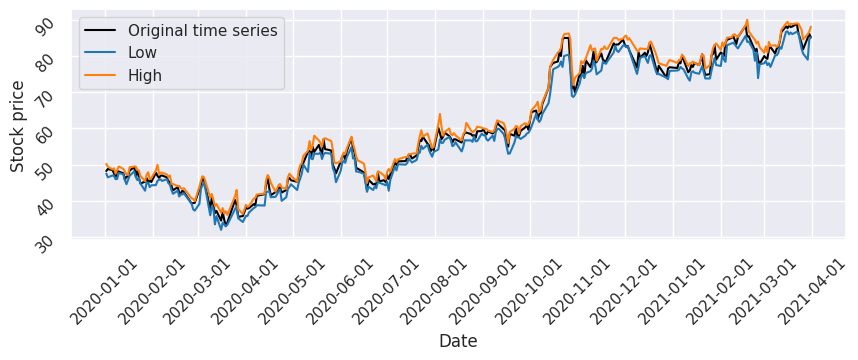

-----------------------------------------------------------------------------
Make function stationary:

The original price values: 
The time series is NOT stationary and the p-value is 0.8357469591520799

Calculating difference...

The price values after difference: 
The time series IS stationary and the p-value is 2.2378042019933748e-30


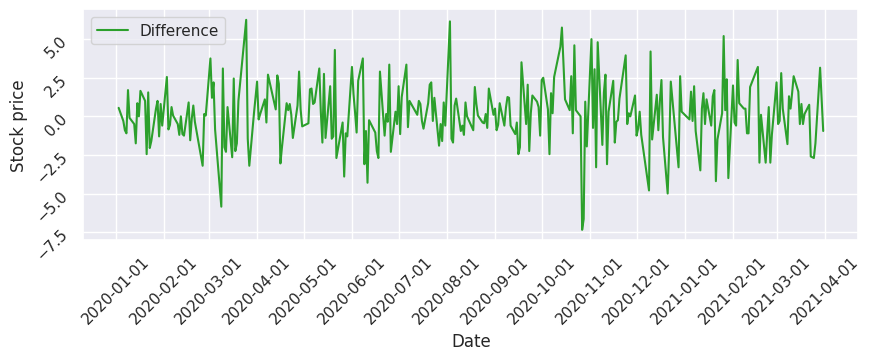

-----------------------------------------------------------------------------
Add additional features:
- Day, Month, Year
- Is_quarter_end
- Low-high
- Mean and std values for specific time windows (3, 7 and 30 days)


,Date,Price,Open,High,Low,Vol.,Change %,Difference,Day,Month,...,Vol._mean_lag_30,Vol._std_lag_3,Vol._std_lag_7,Vol._std_lag_30,Change %_mean_lag_3,Change %_mean_lag_7,Change %_mean_lag_30,Change %_std_lag_3,Change %_std_lag_7,Change %_std_lag_30
0,2020-01-02,48.250000,49.349998,50.200001,47.549999,878500.0,-2.92,0.123411,2,1,...,954433.649691,379204.939672,433889.094352,509253.936474,0.234292,0.231906,0.203886,3.168082,3.341129,3.484215
1,2020-01-03,48.799999,48.250000,49.450001,46.500000,595360.0,1.14,0.549999,3,1,...,878500.000000,379204.939672,433889.094352,509253.936474,-2.920000,-2.920000,-2.920000,3.168082,3.341129,3.484215
2,2020-01-06,48.500000,48.400002,48.700001,47.000000,719240.0,-0.61,-0.299999,6,1,...,736930.000000,200210.214025,200210.214025,200210.214025,-0.890000,-0.890000,-0.890000,2.870854,2.870854,2.870854
3,2020-01-07,47.599998,48.349998,49.000000,46.900002,901950.0,-1.86,-0.900002,7,1,...,731033.333333,141937.933384,141937.933384,141937.933384,-0.796667,-0.796667,-0.796667,2.036427,2.036427,2.036427
4,2020-01-08,46.500000,47.500000,47.500000,46.000000,1180000.0,-2.31,-1.099998,8,1,...,773762.500000,154232.847020,143993.210575,143993.210575,-0.443333,-1.062500,-1.062500,1.506928,1.745668,1.745668


-----------------------------------------------------------------------------
Final attribute list:
 Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'Difference', 'Day', 'Month', 'Is_quarter_end', 'Low-high',
       'Open_mean_lag_3', 'Open_mean_lag_7', 'Open_mean_lag_30',
       'Open_std_lag_3', 'Open_std_lag_7', 'Open_std_lag_30',
       'High_mean_lag_3', 'High_mean_lag_7', 'High_mean_lag_30',
       'High_std_lag_3', 'High_std_lag_7', 'High_std_lag_30', 'Low_mean_lag_3',
       'Low_mean_lag_7', 'Low_mean_lag_30', 'Low_std_lag_3', 'Low_std_lag_7',
       'Low_std_lag_30', 'Vol._mean_lag_3', 'Vol._mean_lag_7',
       'Vol._mean_lag_30', 'Vol._std_lag_3', 'Vol._std_lag_7',
       'Vol._std_lag_30', 'Change %_mean_lag_3', 'Change %_mean_lag_7',
       'Change %_mean_lag_30', 'Change %_std_lag_3', 'Change %_std_lag_7',
       'Change %_std_lag_30'],
      dtype='object')


In [5]:
df = pd.read_csv(os.path.join('data', stocks[0]))
data_name = analysis.get_stock_name(stocks[0])
df = analysis.data_analysis(df);

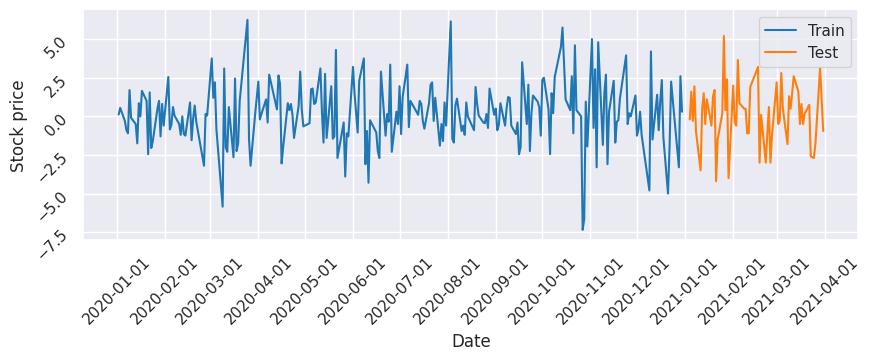

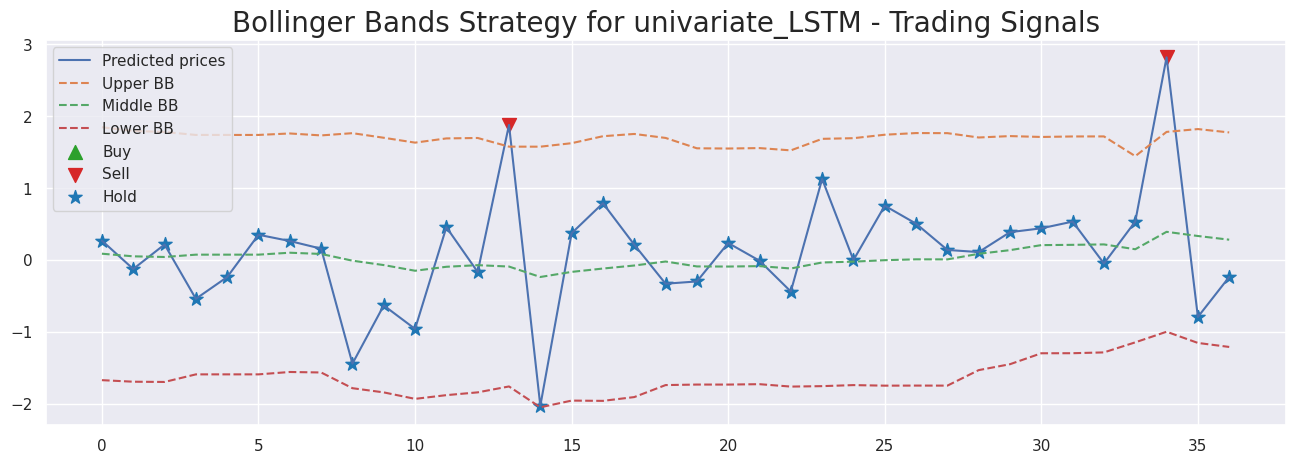

Following the model recommendations we are able to save the following percentages of money: [-182.19, -130.16]


,Model,Train score,Test score
0,univariate_LSTM,2.055413,1.968838


In [67]:
mt.model_training_report(df);